# Ciencia de Datos en Python
## Proyecto #1

### Creacion de entorno virtual en Anaconda 

In [1]:
# conda create --name regression_1 python=3.8 numpy pandas matplotlib seaborn scikit-learn
# conda activate regression_1

In [2]:
### Carga de librerias 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Cargar datos
data = np.load('proyecto_training_data.npy')

# Calculo del 80% para la division de los datos.
split_index = int(len(data) * 0.8)

# Division del dataset para 'entrenamiento y validación'
train_data = data[:split_index]
test_data = data[split_index:]

# Verificación de las subdimensiones para corroborar los conjuntos de datos
print(f'Dataset completo: {data.shape}')
print(f'Set de entrenamiento: {train_data.shape}')
print(f'Set de validación: {test_data.shape}')

Dataset completo: (1460, 6)
Set de entrenamiento: (1168, 6)
Set de validación: (292, 6)


## Análisis exploratorio de datos

In [5]:
# Asignación de nombres a las variables
column_names = ['sales_price', 'overall_qual', 'floor_sqr_feet', 'tot_rooms', 'year_built', 'lot_frontage']

# Conversión de datos 'entrenamiento' en un DataFrame y asignación de nombres a las variables
train_df = pd.DataFrame(data, columns=column_names)

train_df.head()

# Calculo de estadísticas descriptivas para cada variable
descriptive_stats = train_df.describe()

# Calcular el rango (peak-to-peak) para cada variable
ranges = train_df.max() - train_df.min()

# Agregar el rango al DataFrame de estadísticas descriptivas
descriptive_stats.loc['range'] = ranges

descriptive_stats

,sales_price,overall_qual,floor_sqr_feet,tot_rooms,year_built,lot_frontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000
range,720100.000000,9.000000,4358.000000,12.000000,138.000000,292.000000


In [6]:
train_df.head()

,sales_price,overall_qual,floor_sqr_feet,tot_rooms,year_built,lot_frontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


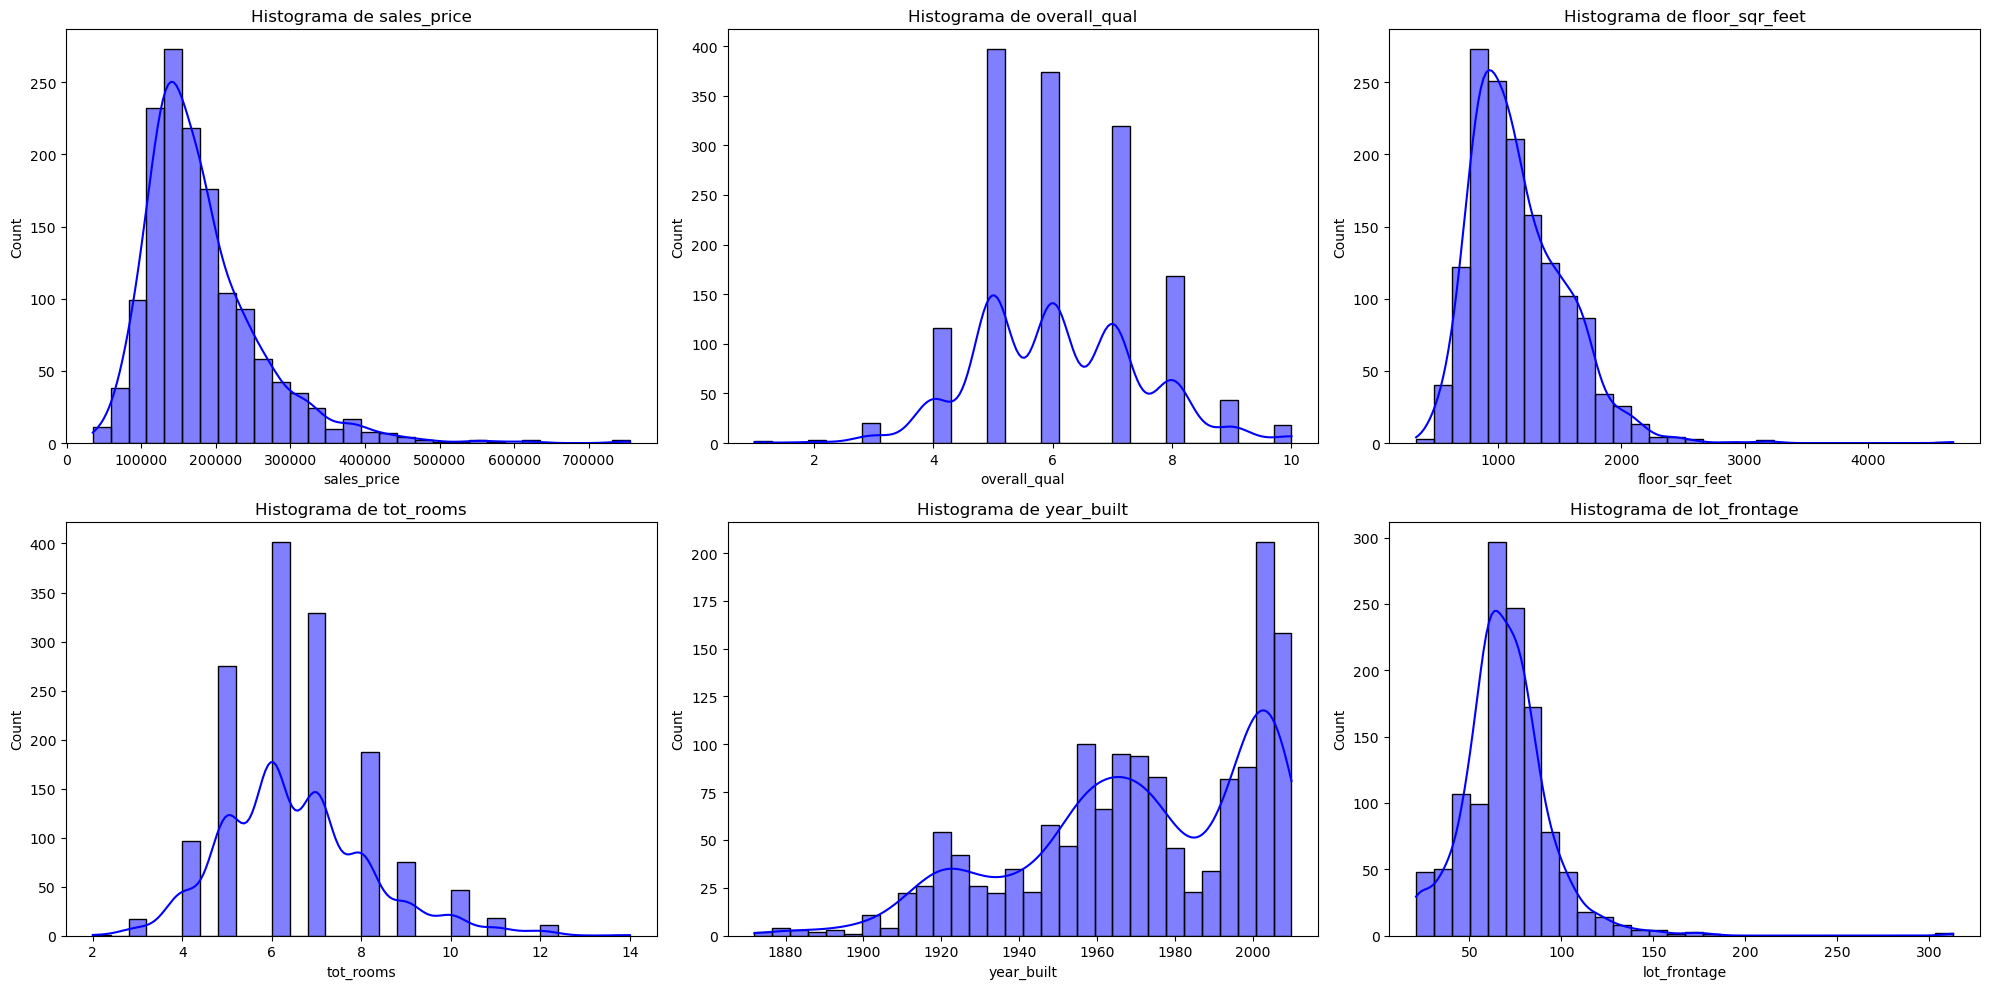

In [7]:
# Configuración para mejorar la visualización
plt.figure(figsize=(20, 10))

# Graficar histogramas para cada variable
for i, column in enumerate(train_df.columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(train_df[column].dropna(), kde=True, color = 'blue',
                 bins=30)  # Eliminacion de NAs para vizualizacion
    plt.title(f'Histograma de {column}')

plt.tight_layout()
plt.show()

- ***sales_price (precio de venta):*** Este histograma representará la distribución de los precios de venta de las propiedades. Es probable que veamos una distribución sesgada hacia la derecha, donde la mayoría de las propiedades tienen precios más bajos con algunas excepciones de propiedades con precios mucho más altos. Este patrón es común en datos de precios de propiedades debido a la presencia de propiedades de lujo o de características excepcionales.

- ***overall_qual(calificación general):*** Dado que esta variable califica la calidad general del material y el acabado de la casa en una escala ordinal (1 a 10), el histograma podría mostrar una distribución donde ciertas calidades son más comunes que otras. Podríamos esperar ver picos en calificaciones específicas que son típicamente más prevalentes en el mercado, como calidades medias a altas.

- ***floor_sqr_feet (pies cuadrados del primer piso):*** Este histograma mostrará cómo se distribuyen los tamaños de los primeros pisos de las propiedades. Es probable que veamos una distribución con un sesgo hacia la derecha, reflejando que hay más casas con áreas de piso menores, con una disminución gradual en el número de casas a medida que aumenta el área de piso.

- ***tot_rooms (total de habitaciones sobre rasante, excluyendo baños):*** Esta variable puede mostrar una distribución que refleje el diseño típico de viviendas en el área de estudio. Es probable que exista un rango común de número de habitaciones que refleje el diseño estándar de las casas, con menos casas teniendo un número muy bajo o muy alto de habitaciones.

- ***year_built (año de construcción):*** El histograma para el año de construcción podría revelar tendencias en la construcción de viviendas a lo largo del tiempo. Por ejemplo, podríamos ver picos que corresponden a periodos de auge de la construcción. La distribución también podría mostrar cómo las casas más antiguas se comparan en número con las más nuevas en el dataset.

- ***lot_frontage (pies lineales de calle conectados a la propiedad):*** Esta variable podría tener una distribución que muestre la mayoría de las propiedades con un frente de lote estándar, con algunas propiedades teniendo frentes de lote excepcionalmente largos o cortos. Similar a otras variables continuas relacionadas con el tamaño de la propiedad, podríamos esperar un sesgo hacia la derecha, con la mayoría de las propiedades teniendo frentes de lote más cortos.


In [8]:
correlation_coeffs = {}
for var in column_names[1:]:  # Ignorar 'sales_price' para el loop, ya que es la variable Y
    x = train_df[var].dropna()
    y = train_df['sales_price'].dropna()
    common_indices = y.index.intersection(x.index)
    corr_coeff = np.corrcoef(x.loc[common_indices], y.loc[common_indices])[0, 1]
    correlation_coeffs[var] = corr_coeff

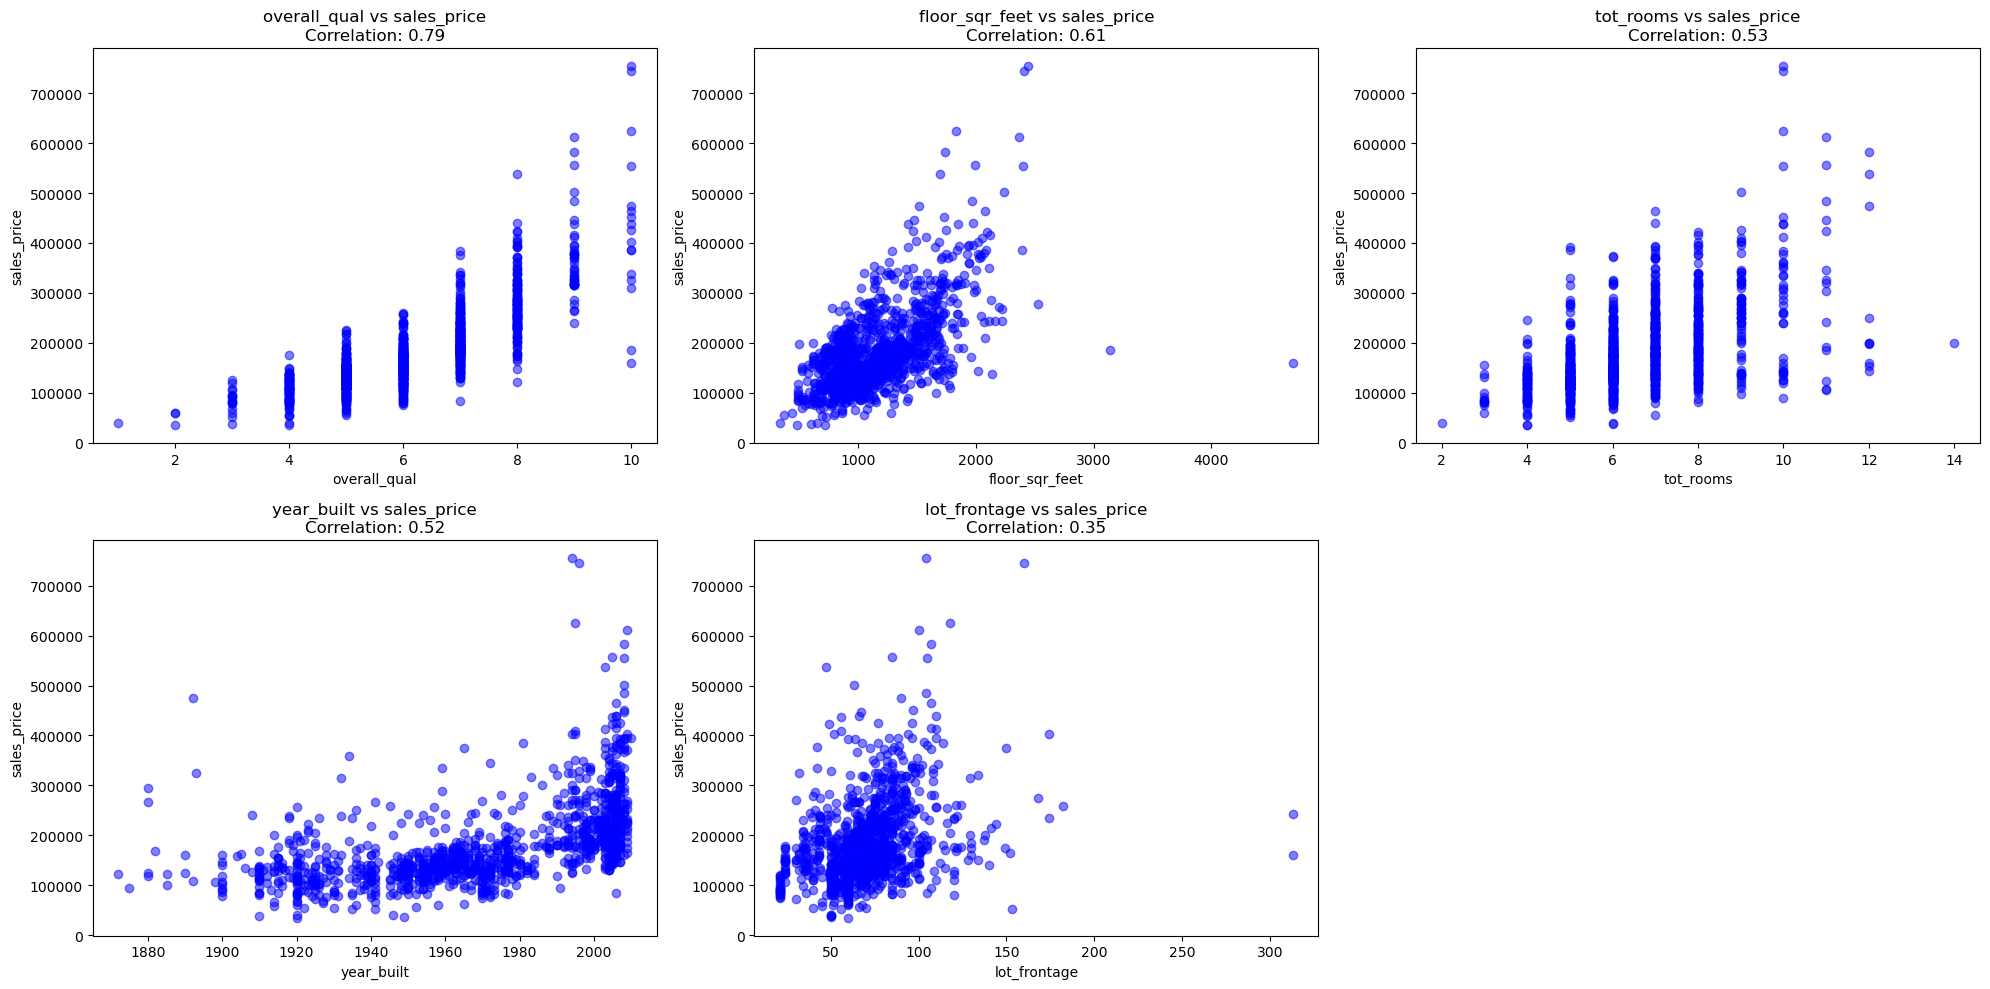

In [9]:
plt.figure(figsize=(20, 10))
for i, (var, corr_coeff) in enumerate(correlation_coeffs.items(), 1):
    plt.subplot(2, 3, i)
    x = train_df[var].loc[common_indices]  # Usar los mismos índices comunes
    y = train_df['sales_price'].loc[common_indices]
    plt.scatter(x, y, color='blue', alpha=0.5)
    plt.title(f'{var} vs sales_price\nCorrelation: {corr_coeff:.2f}')
    plt.xlabel(var)
    plt.ylabel('sales_price')
plt.tight_layout()
plt.show()

In [10]:
variables_sorted_by_corr = sorted(correlation_coeffs, key=correlation_coeffs.get, reverse=True)[:2]
print(f'Las variables con más potencial predictivo son: {variables_sorted_by_corr[0]} y {variables_sorted_by_corr[1]} con coeficientes de correlación de {correlation_coeffs[variables_sorted_by_corr[0]]:.2f} y {correlation_coeffs[variables_sorted_by_corr[1]]:.2f}, respectivamente.')


Las variables con más potencial predictivo son: overall_qual y floor_sqr_feet con coeficientes de correlación de 0.79 y 0.61, respectivamente.


In [11]:
import numpy as np

class LinearRegressionModel:
    def __init__(self):
        self.beta = None  #inicializacion de los betas
    
    def train(self, x, y, epochs, print_error_every, alpha):
        pass  #implementaction de logica de entrenamiento
    def predict(self, x):
        
        X = np.vstack([np.ones(len(x)), x]).T
        return X.dot(self.beta)


In [12]:
train_linear_regression(X_1, VariableY, 10, 

SyntaxError: incomplete input (1686820946.py, line 1)